### Import libraries and data

In [3]:
import great_expectations as ge
import pandas as pd

In [ ]:
url = "https://github.com/hnawaz007/pythondataanalysis/blob/main/ETL%20Pipeline/Pytest/Session%20one/Product.xlsx?raw=true"
# read from url
df=pd.read_excel(url)
df.head()

,ProductKey,ProductAlternateKey,ProductSubcategoryKey,WeightUnitMeasureCode,SizeUnitMeasureCode,EnglishProductName,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,...,DaysToManufacture,ProductLine,DealerPrice,Class,Style,ModelName,EnglishDescription,StartDate,EndDate,Status
0,1,AR-5381,NaN,NaN,NaN,Adjustable Race,NaN,0,NaN,1000,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01,NaT,Current
1,2,BA-8327,NaN,NaN,NaN,Bearing Ball,NaN,0,NaN,1000,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01,NaT,Current
2,3,BE-2349,NaN,NaN,NaN,BB Ball Bearing,NaN,0,NaN,800,...,1,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01,NaT,Current
3,4,BE-2908,NaN,NaN,NaN,Headset Ball Bearings,NaN,0,NaN,800,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01,NaT,Current
4,5,BL-2036,NaN,NaN,NaN,Blade,NaN,0,NaN,800,...,1,NaN,NaN,NaN,NaN,NaN,NaN,2003-07-01,NaT,Current


### Convert pandas dataframe to Great Expectation

In [ ]:
my_df = ge.from_pandas(df)

In [ ]:
type(my_df)

great_expectations.dataset.pandas_dataset.PandasDataset

### GE Data Quality Tests

In [ ]:
# check number of rows in the dataset
my_df.expect_table_row_count_to_equal(1000)

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": false,
  "result": {
    "observed_value": 606
  },
  "meta": {}
}

### Primary Key Test

In [ ]:
my_df.expect_column_to_exist('ProductKey')

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {},
  "meta": {}
}

In [ ]:
my_df.expect_column_values_to_be_unique('ProductKey')

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "element_count": 606,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {}
}

In [ ]:
my_df.expect_column_values_to_not_be_null('ProductKey')

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "element_count": 606,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {}
}

In [ ]:
my_df.expect_column_values_to_be_in_type_list("ProductKey", ["int", "int64"])

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "observed_value": "int64"
  },
  "meta": {}
}

### Test values in a set (list)

In [ ]:
df.ProductLine.unique()

array([nan, 'R ', 'S ', 'M ', 'T '], dtype=object)

In [ ]:
my_df.expect_column_values_to_be_in_set("ProductLine", ['R ', 'S ', 'M ', 'T '])

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "element_count": 606,
    "missing_count": 226,
    "missing_percent": 37.29372937293729,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {}
}

In [ ]:
my_df.expect_column_values_to_be_in_set("Color", [ 'Black', 'Silver', 'Red', 'White', 'Blue', 'Multi', 'Yellow','Grey', 'Silver'])

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": false,
  "result": {
    "element_count": 606,
    "missing_count": 254,
    "missing_percent": 41.914191419141915,
    "unexpected_count": 7,
    "unexpected_percent": 1.9886363636363635,
    "unexpected_percent_total": 1.155115511551155,
    "unexpected_percent_nonmissing": 1.9886363636363635,
    "partial_unexpected_list": [
      "Silver/Black",
      "Silver/Black",
      "Silver/Black",
      "Silver/Black",
      "Silver/Black",
      "Silver/Black",
      "Silver/Black"
    ]
  },
  "meta": {}
}

### Check min and Max range of column

In [ ]:
df.SafetyStockLevel.unique()

array([1000,  800,  500,   60,    4,  100], dtype=int64)

In [ ]:
my_df.expect_column_max_to_be_between("SafetyStockLevel", 1, 1000)

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "observed_value": 1000,
    "element_count": 606,
    "missing_count": null,
    "missing_percent": null
  },
  "meta": {}
}

In [ ]:
my_df.expect_column_max_to_be_between("DaysToManufacture", 1, 10)

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "observed_value": 4,
    "element_count": 606,
    "missing_count": null,
    "missing_percent": null
  },
  "meta": {}
}

In [ ]:
my_df.expect_column_mean_to_be_between("StandardCost", 100, 500)

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "observed_value": 434.26582886075965,
    "element_count": 606,
    "missing_count": 211,
    "missing_percent": 34.81848184818482
  },
  "meta": {}
}

### Test Text columns (Nulls)

In [ ]:
my_df.expect_column_values_to_not_be_null('EnglishProductName')

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "element_count": 606,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {}
}

In [ ]:
my_df.expect_column_values_to_not_be_null("Color", mostly=0.55)

{
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  },
  "success": true,
  "result": {
    "element_count": 606,
    "unexpected_count": 254,
    "unexpected_percent": 41.914191419141915,
    "unexpected_percent_total": 41.914191419141915,
    "partial_unexpected_list": []
  },
  "meta": {}
}

### Save your test cases and re-use

In [ ]:
my_df.get_expectations_config()

{
  "ge_cloud_id": null,
  "expectations": [
    {
      "meta": {},
      "kwargs": {
        "column": "ProductKey"
      },
      "expectation_type": "expect_column_to_exist"
    },
    {
      "meta": {},
      "kwargs": {
        "column": "ProductKey"
      },
      "expectation_type": "expect_column_values_to_be_unique"
    },
    {
      "meta": {},
      "kwargs": {
        "column": "ProductKey"
      },
      "expectation_type": "expect_column_values_to_not_be_null"
    },
    {
      "meta": {},
      "kwargs": {
        "column": "ProductKey",
        "type_list": [
          "int",
          "int64"
        ]
      },
      "expectation_type": "expect_column_values_to_be_in_type_list"
    },
    {
      "meta": {},
      "kwargs": {
        "column": "ProductLine",
        "value_set": [
          "R ",
          "S ",
          "M ",
          "T "
        ]
      },
      "expectation_type": "expect_column_values_to_be_in_set"
    },
    {
      "meta": {},
      "kwarg

In [ ]:
config = my_df.get_expectations_config()

In [ ]:
my_df.save_expectation_suite('product.data.expectations.json')

In [ ]:
df2 = ge.read_excel(url)

In [ ]:
df2.validate(expectation_suite=config)

{
  "success": true,
  "results": [
    {
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      },
      "expectation_config": {
        "meta": {},
        "kwargs": {
          "column": "ProductKey"
        },
        "expectation_type": "expect_column_to_exist"
      },
      "success": true,
      "result": {},
      "meta": {}
    },
    {
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      },
      "expectation_config": {
        "meta": {},
        "kwargs": {
          "column": "ProductKey"
        },
        "expectation_type": "expect_column_values_to_be_unique"
      },
      "success": true,
      "result": {
        "element_count": 606,
        "missing_count": 0,
        "missing_percent": 0.0,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "unexpected_percent_total": 0.0,
  

### Test with Config file

In [ ]:
#
test_results = df2.validate(expectation_suite="product.data.expectations.json")

In [ ]:
# Take action based on the results
if test_results["success"]:
    print ("Awesome. All Data Quality Tests are green!")
else:
    raise Exception("You've got issues.")

Awesome. All Data Quality Tests are green!


tutorial: https://github.com/prodramp/publiccode/tree/master/python/greatexpectation-work

library: https://github.com/great-expectations/great_expectations 


In [5]:
mydf=ge.read_csv("/Users/ikawahyuni/dataquality/accounts.csv")
print(mydf)

  Customer_ID                              Name                  Phone
0   CUST00001                          Hall Ltd       243.828.4664x425
1   CUST00002                    Jones and Sons           364.741.7637
2   CUST00003                        Sims-Payne  +1-373-579-1795x47644
3   CUST00004                      Roman-Graham      247.448.0091x3707
4   CUST00005  Rodriguez, Campbell and Sullivan     401.745.5207x11263


In [20]:
#Data Quality check: Columns, Null
import great_expectations as ge
import pandas as pd
import os
from great_expectations.dataset import PandasDataset

# Path to your CSV files
path = "/Users/ikawahyuni/dataquality/"

# Mapping of CSV files to their expected columns
file_to_expected_columns = {
    "accounts.csv": ["Customer_ID", "Name", "Phone"],
    "contacts.csv": ["FirstName", "LastName", "Email", "Customer_ID"],
    "cases.csv": ["Type", "Customer_ID", "ContactEmail"]
}

# Initialize a list to collect validation summaries
validation_summaries = []

# Iterate over each file and its expected columns
for file_name, expected_columns in file_to_expected_columns.items():
    # Read the CSV file into a Great Expectations PandasDataset
    file_path = os.path.join(path, file_name)
    df = pd.read_csv(file_path)
    dataset = PandasDataset(df)

    # Dynamically add expectations for each column
    for column in expected_columns:
        dataset.expect_column_to_exist(column)
        dataset.expect_column_values_to_not_be_null(column)

    # Validate the dataset and collect results
    results = dataset.validate()
    validation_summary = {
        "file_name": file_name,
        "success": results["success"],
        "results": results["results"],
        "statistics": results["statistics"]
    }
    validation_summaries.append(validation_summary)

# Convert the summaries into a DataFrame for easy viewing
results_df = pd.DataFrame(validation_summaries, columns=["file_name", "success", "statistics"])

print(results_df)


      file_name  success                                         statistics
0  accounts.csv     True  {'evaluated_expectations': 6, 'successful_expe...
1  contacts.csv     True  {'evaluated_expectations': 8, 'successful_expe...
2     cases.csv     True  {'evaluated_expectations': 6, 'successful_expe...


In [3]:
from simple_salesforce import Salesforce

In [6]:
token= 'xrBaX9uYgjfWhNR4pH7AR9PI'
ps='2097@Hilm'
token2='1ac0iQrzw1gIQxNHjJniqvHNS'

sf = Salesforce(username='master.alex7@gmail.com', password=ps, security_token=token)
query_result=sf.query_all("select Email from Contact")
emails = [record['Email'] for record in query_result['records']]
emails = "\n".join(emails)
print(emails)


master.alex@gmail.com


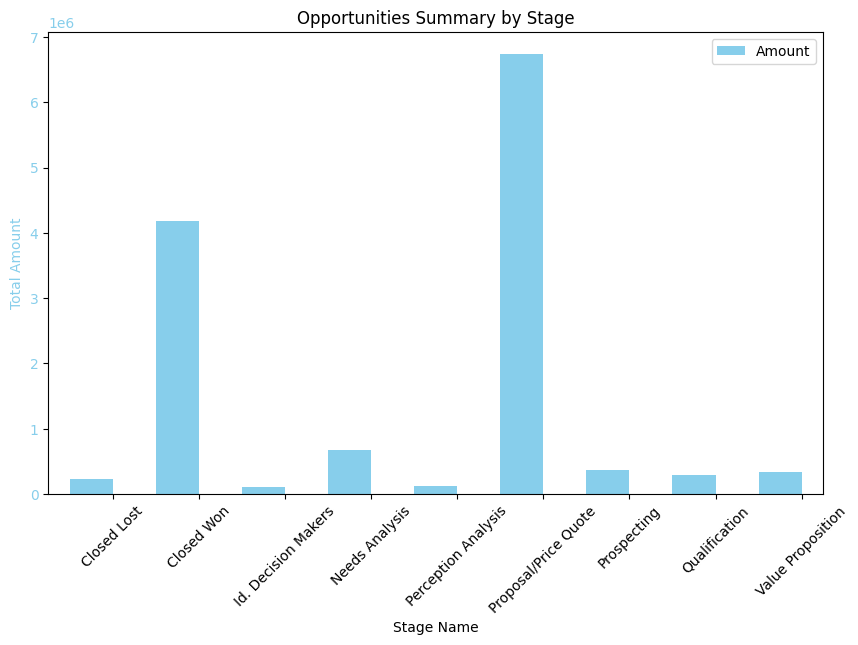

In [11]:
from simple_salesforce import Salesforce
import pandas as pd

sf = Salesforce(username='master.alex10@gmail.com', password=ps, security_token=token2)
query = """
SELECT Name, StageName, Amount, CloseDate
FROM Opportunity
"""

opportunities = sf.query_all(query)
opportunities_df = pd.DataFrame(opportunities['records']).drop(columns='attributes')

opportunities_df['CloseDate'] = pd.to_datetime(opportunities_df['CloseDate'])
summary_by_stage = opportunities_df.groupby('StageName').agg({'Amount': 'sum', 'Name': 'count'}).rename(columns={'Name': 'OpportunityCount'}).reset_index()

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 6))
summary_by_stage.plot(kind='bar', x='StageName', y='Amount', ax=ax1, color='skyblue', position=1, title="Opportunities Summary by Stage")

ax1.set_xlabel('Stage Name')
ax1.set_ylabel('Total Amount', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

plt.xticks(rotation=45)
plt.show()


In [3]:
#create dummy data for Omni 4: 5k records
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

# Initialize Faker instance
fake = Faker()

# Constants
NUM_RECORDS = 10
CSV_FILE_NAME = '/Users/ikawahyuni/dataquality/dummy_data.csv'

# Function to generate random Date & Time
def random_date_time(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))

# Function to generate random Time
def random_time():
    return datetime.strptime('{}:{}:{}'.format(random.randint(0, 23), random.randint(0, 59), random.randint(0, 59)), '%H:%M:%S').time()

# Define a date range for generating random Date & Time fields
start_date = datetime(2021, 1, 1)
end_date = datetime(2023, 1, 1)

# Create dummy data for Omni 4
dummy_data = {
    'CHANNEL NAME': [fake.text(max_nb_chars=25) for _ in range(NUM_RECORDS)],
    'CWC ID': [fake.random_number(digits=8, fix_len=True) for _ in range(NUM_RECORDS)],
    'DATE IN': [random_date_time(start_date, end_date) for _ in range(NUM_RECORDS)],
    'PICKUP DATE': [random_date_time(start_date, end_date) for _ in range(NUM_RECORDS)],
    'DATE SUBMIT': [random_date_time(start_date, end_date) for _ in range(NUM_RECORDS)],
    'RESPONSE TIME': [random_time() for _ in range(NUM_RECORDS)],
    'TIME CONSUME': [random_time() for _ in range(NUM_RECORDS)],
    'CUST NAME': [fake.name() for _ in range(NUM_RECORDS)],
    'CUST HP': [fake.random_number(digits=13, fix_len=True) for _ in range(NUM_RECORDS)],
    'CUST PHONE1': [fake.random_number(digits=13, fix_len=True) for _ in range(NUM_RECORDS)],
    'CUST EMAIL': [fake.email() for _ in range(NUM_RECORDS)], # Generating as text since no specific pattern provided
    'CATEGORY': [fake.text(max_nb_chars=64) for _ in range(NUM_RECORDS)],
    'SUB CATEGORY': [fake.text(max_nb_chars=255) for _ in range(NUM_RECORDS)],
    'REMARK': [fake.text() for _ in range(NUM_RECORDS)], # Unlimited length handled by Faker's default behavior
    'FEEDBACK': [fake.text() for _ in range(NUM_RECORDS)], # Unlimited length handled by Faker's default behavior
    'PIC': [fake.text(max_nb_chars=64) for _ in range(NUM_RECORDS)],
    'AGENT ID': [fake.random_number(digits=8) for _ in range(NUM_RECORDS)], # Assuming it's not fixed length
    'STATUS': [fake.word() for _ in range(NUM_RECORDS)], # Assuming any text value is acceptable
    'SENTIMENT': [fake.text(max_nb_chars=32) for _ in range(NUM_RECORDS)],
}

# Convert to DataFrame
df = pd.DataFrame(dummy_data)

# Save to CSV
df.to_csv(CSV_FILE_NAME, index=False)

# Outputting the path to the saved file
CSV_FILE_NAME




'/Users/ikawahyuni/dataquality/dummy_data.csv'

In [10]:
#Dummy Data for Omni 4
#the datetime format should be "2024-03-05T06:31:36.000+0000" for date-time fields, and the time format should be "08:00:00.000Z" for time fields.

import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

# Initialize Faker instance
fake = Faker()

# Constants
NUM_RECORDS = 10
CSV_FILE_NAME = '/Users/ikawahyuni/dataquality/dummy_data_account.csv'

# Function to generate random Date & Time in the specified format
def random_date_time(start, end):
    random_date = start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())))
    return random_date.strftime("%Y-%m-%dT%H:%M:%S.000+0000")

# Function to generate random Time in the specified format
def random_time():
    random_time = datetime.strptime('{}:{}:{}'.format(random.randint(0, 23), random.randint(0, 59), random.randint(0, 59)), '%H:%M:%S').time()
    return random_time.strftime("%H:%M:%S.000Z")

# Define a date range for generating random Date & Time fields
start_date = datetime(2021, 1, 1)
end_date = datetime(2023, 1, 1)

# Create dummy data for Omni 4
dummy_data = {
    'CHANNEL NAME': [fake.text(max_nb_chars=25) for _ in range(NUM_RECORDS)],
    'CWC ID': [fake.random_number(digits=8, fix_len=True) for _ in range(NUM_RECORDS)],
    'DATE IN': [random_date_time(start_date, end_date) for _ in range(NUM_RECORDS)],
    'PICKUP DATE': [random_date_time(start_date, end_date) for _ in range(NUM_RECORDS)],
    'DATE SUBMIT': [random_date_time(start_date, end_date) for _ in range(NUM_RECORDS)],
    'RESPONSE TIME': [random_time() for _ in range(NUM_RECORDS)],
    'TIME CONSUME': [random_time() for _ in range(NUM_RECORDS)],
    'CUST NAME': [fake.name() for _ in range(NUM_RECORDS)],
    'CUST HP': [fake.random_number(digits=13, fix_len=True) for _ in range(NUM_RECORDS)],
    'CUST PHONE1': [fake.random_number(digits=13, fix_len=True) for _ in range(NUM_RECORDS)],
    'CUST EMAIL': [fake.email() for _ in range(NUM_RECORDS)],
    'CATEGORY': [fake.text(max_nb_chars=64) for _ in range(NUM_RECORDS)],
    'SUB CATEGORY': [fake.text(max_nb_chars=255) for _ in range(NUM_RECORDS)],
    'REMARK': [fake.text() for _ in range(NUM_RECORDS)],
    'FEEDBACK': [fake.text() for _ in range(NUM_RECORDS)],
    'PIC': [fake.text(max_nb_chars=64) for _ in range(NUM_RECORDS)],
    'AGENT ID': [fake.random_number(digits=8) for _ in range(NUM_RECORDS)],
    'STATUS': [fake.word() for _ in range(NUM_RECORDS)],
    'SENTIMENT': [fake.text(max_nb_chars=32) for _ in range(NUM_RECORDS)],
}

# Convert to DataFrame
df = pd.DataFrame(dummy_data)

# Save to CSV
df.to_csv(CSV_FILE_NAME, index=False)

# Outputting the path to the saved file
print(CSV_FILE_NAME)


/Users/ikawahyuni/dataquality/dummy_data_account.csv


In [3]:
#Create dummy data for Financial Account (DONE)

import csv
import random
import os

def generate_dummy_data(file_path, file_name, num_rows):
    # Define possible values for each column
    products = ['Checking Account', 'Savings Account', 'Mortgage', 'Personal Loan']
    record_types = ['New Application', 'Servicing', 'Closed']
    interest_rates = [i * 0.1 for i in range(1, 11)]  # 0.1 to 1.0
    loan_terms = [12, 24, 36, 48, 60, 72, 84]  # in months
    branch_codes = [f'B{i:03d}' for i in range(1, 101)]  # B001 to B100
    households = ['Low Income', 'Middle Income', 'High Income', 'Primary', 'Secondary']

    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    
    # Writing to the CSV file
    with open(os.path.join(file_path, file_name), mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Product', 'Record Type', 'Account Number', 'Interest Rate', 'Loan Term(months)', 'Branch Code', 'Household'])
        
        for _ in range(num_rows):
            writer.writerow([
                random.choice(products),
                random.choice(record_types),
                ''.join(["{}".format(random.randint(0, 9)) for _ in range(15)]),  # 15-digit Account Number
                random.choice(interest_rates),
                random.choice(loan_terms),
                random.choice(branch_codes),
                random.choice(households)
            ])


file_path = '/Users/ikawahyuni/dataquality/'  
file_name = 'financial_accounts_dummy.csv'
num_rows = 100  # Adjust as needed

generate_dummy_data(file_path, file_name, num_rows)


In [11]:
#Create dummy data for Account (DONE)

import csv
import random
import os

def generate_dummy_data(file_path, file_name, num_rows):
    # Define possible values for each column
    account_names = ['John Doe', 'Jane Smith', 'Mike Brown', 'Lisa Green', 'Mark Taylor']
    account_owners = ['Owner A', 'Owner B', 'Owner C', 'Owner D']
    nasabah_types = ['Nasabah', 'Non Nasabah']
    account_record_types = ['Personal','Non Personal']

    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    
    # Writing to the CSV file
    with open(os.path.join(file_path, file_name), mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Account Name', 'CIF No', 'Account Owner', 'No Telp', 'Email', 'Nasabah Type', 'Account Record Type'])
        
        for _ in range(num_rows):
            account_name = random.choice(account_names)
            email = f"{account_name.split(' ')[0].lower()}.{account_name.split(' ')[1].lower()}@example.com"
            writer.writerow([
                account_name,
                ''.join(["{}".format(random.randint(0, 9)) for _ in range(10)]),  # 10-digit CIF No
                random.choice(account_owners),
                f'+62{random.randint(1000000000, 9999999999)}',  
                email,
                random.choice(nasabah_types),
                random.choice(account_record_types)
            ])


file_path = '/Users/ikawahyuni/dataquality/'  
file_name = 'accounts_dummy.csv'
num_rows = 10  # Adjust as needed

generate_dummy_data(file_path, file_name, num_rows)


In [36]:
#Create dummy data for Social Account (DONE)

import csv
import random
import os
from faker import Faker

# Initialize Faker instance
fake = Faker()

def generate_username():
    # Types of username formats to mimic a wide range of social media usernames
    formats = [
        lambda: f"@{fake.user_name()}",  # Starts with @
        lambda: f"{fake.user_name()}{random.randint(10,99)}",  # Ends with numbers
        lambda: f"{fake.user_name()}_{''.join(random.choice('abcdefghijklmnopqrstuvwxyz0123456789') for i in range(random.randint(1, 5)))}",  # With underscore and random characters
        lambda: f"{fake.user_name()}.{random.choice(['', fake.user_name(), random.randint(10,99)])}",  # With period and optional extra username or numbers
    ]
    return random.choice(formats)()

def generate_dummy_social_account_data(file_path, file_name, num_rows):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    
    # Writing to the CSV file
    with open(os.path.join(file_path, file_name), mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Username', 'CIF'])
        
        for _ in range(num_rows):
            username = generate_username()
            cif_no = ''.join([str(random.randint(0, 9)) for _ in range(10)])  # 10-digit CIF No
            writer.writerow([username, cif_no])

file_path = '/Users/ikawahyuni/dataquality/'  
file_name = 'social_accounts_dummy.csv'
num_rows = 100  # Adjust as needed

generate_dummy_social_account_data(file_path, file_name, num_rows)


In [7]:
# Create dummy data for Social Post (DONE)

import csv
import random
import os
from faker import Faker

# Initialize Faker instance
fake=Faker()

def generate_username():
    #Types of username formats to mimic a wide range of social media usernames
    formats = [
        lambda: f"@{fake.user_name()}", #Starts with @  
    ]


def generate_username():
    """Generates usernames in various styles to mimic social media platforms."""
    styles = [
        lambda: f"@{fake.user_name()}{random.randint(10, 99)}",  # @username99
        lambda: f"{fake.user_name()}_{fake.word()}",             # username_word
        lambda: f"{fake.word()}.{fake.user_name()}",             # word.username
        lambda: f"{fake.user_name()}{random.choice(['_', '.'])}{fake.word()}",  # username_word or username.word
    ]
    return random.choice(styles)()

def generate_dummy_social_post_data(file_path, file_name, num_rows):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    
    # Writing to the CSV file
    with open(os.path.join(file_path, file_name), mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Username', 'Message'])
        
        for _ in range(num_rows):
            username = generate_username()
            message = fake.text(max_nb_chars=280)  # Generate a bit long message, akin to a social media post
            writer.writerow([username, message])

file_path = '/Users/ikawahyuni/dataquality/'  
file_name = 'social_posts_dummy.csv'
num_rows = 10  # Adjust as needed

generate_dummy_social_post_data(file_path, file_name, num_rows)


In [32]:
import faker

for _ in range(5):
    print(fake.job())

Video editor
Scientist, forensic
Research officer, government
Psychiatrist
Politician's assistant


In [8]:
import csv
import random
from datetime import datetime, timedelta

# All column names
col=[
    'Analisa Skill', 
    'Tgl Assigned', 
    'Assignee', 
    'AssigneeGroupLeaderID', 
    'Attachment', 
    'AttachmentDone', 
    'PIC', 
    'Butuh Attachment', 
    'Butuh Eskalasi ke BRISolutions', 
    'Call Type ID', 
    'Call Type', 
    'Case Number', 
    'Charge Fee', 
    'Close Date', 
    'CountAgeAttachmentNull', 
    'Create Date (Legacy)', 
    'Current GIC', 
    'Customer Feedback', 
    'Date re-check', 
    'Description', 
    'Email Assignee', 
    'Email Kabag', 
    'Email Supervisor', 
    'Email Wakabag', 
    'Escalated Date', 
    'Fitur', 
    'FlagAutoClosedTicketAttachment', 
    'Formulir Detail', 
    'Forwad Date', 
    'Gateway', 
    'GIC', 
    'Handling Time', 
    'Hasil Kunjungan', 
    'Hasil Penelitian', 
    'Tgl In Progress', 
    'IsAttachmentDone?', 
    'Jenis Produk', 
    'Jenis CallType', 
    'Jenis Produk 1 LKPBU', 
    'Jenis Produk 2 LKPBU', 
    'Jenis Transaksi LKPBU', 
    'JP LKPBU 2', 
    'Kabag Login ID', 
    'Kategori Permasalahan LKPBU', 
    'KIP Date', 
    '> 40  Hari Kerja', 
    'Legacy Ticket ID', 
    'Level', 
    'Max 20 HK', 
    'Max 40 HK', 
    'Merchant ID', 
    'Nama Kabag', 
    'Nama Supervisor', 
    'Nama Wakabag', 
    'Nominal', 
    'Notes', 
    'Notify By', 
    'Case Origin', 
    'Case Owner', 
    'Penyebab Pengaduan 2 LKPBU', 
    'Penyebab Pengaduan LKPBU', 
    'Phone Survey', 
    'Pickup Date', 
    'PP LKPBU 2', 
    're-check dokument', 
    'RecordTypeId', 
    'Returned', 
    'Search Call Type', 
    'Site User', 
    'SLA Status', 
    'Status', 
    'Status LKPBU', 
    'Sub Type', 
    'Submitter Login ID', 
    'SupervisorLoginId', 
    'SuppliedName', 
    'Tanggal', 
    'TanggalAttachmentDone', 
    'TID', 
    'Tiket Urgency', 
    'Top Call Type', 
    'Type', 
    'SuppliedPhone', 
    'SuppliedEmail', 
    'User', 
    'User Group', 
    'User Login Name', 
    'User re-check', 
    'Usergroup ID', 
    'Wakabag Login Id', 
    'Social Persona', 
    'CWC ID (Need Confirm)', 
    'DATE IN', 
    'KIP NAME (Need Confirm)'
]


def generate_dummy_date(start_year=2020, end_year=2023):
    """Generate a random datetime between two datetime objects."""
    start_date = datetime(start_year, 1, 1, 0, 0, 0)
    end_date = datetime(end_year, 12, 31, 23, 59, 59)
    return start_date + (end_date - start_date) * random.random()

def random_yes_no():
    """Randomly choose between 'Yes' and 'No'."""
    return random.choice(['Yes', 'No'])

def generate_dummy_data(file_path, file_name, num_rows):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    
    with open(os.path.join(file_path, file_name), mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(col)
        for _ in range(num_rows):
            # Generate random values for each field. This example includes only a few fields for brevity.
            analisa_skill = random.choice(['Skill A', 'Skill B', 'Skill C'])
            tgl_assigned = generate_dummy_date().strftime('%Y-%m-%d')
            assignee = f"Assignee_{random.randint(1, 100)}"
            assignee_group_leader_id = f"Leader_{random.randint(1, 50)}"
            attachment = random_yes_no()
            attachment_done = random_yes_no()
            pic = f"PIC_{random.randint(1, 100)}"
            butuh_attachment = random_yes_no()
            butuh_eskalasi_ke_brisolutions = random_yes_no()
            # Continue generating dummy data for each column similarly

            # Write the generated row to the CSV
            writer.writerow([
                analisa_skill, tgl_assigned, assignee, assignee_group_leader_id, attachment,
                attachment_done, pic, butuh_attachment, butuh_eskalasi_ke_brisolutions,
                # Continue with the values for other fields
            ])

# Directory 
file_path = '/Users/ikawahyuni/dataquality' 
file_name = 'cases_dummy.csv'
num_rows = 100  # Adjust as needed

generate_dummy_data(file_path, file_name, num_rows)


In [3]:
#Create Dummy files (DONE)
import os
from PIL import Image
import zipfile
import docx
from PyPDF2 import PdfWriter
import pandas as pd

def generate_dummy_files(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Generate a dummy DOC file
    doc = docx.Document()
    doc.add_paragraph("This is a dummy DOC file.")
    doc.save(os.path.join(directory, "dummy.doc"))

    # Generate a dummy PDF file
    pdf_writer = PdfWriter()
    with open(os.path.join(directory, "dummy.pdf"), "wb") as pdf_output:
        pdf_writer.write(pdf_output)

    # Generate a dummy ZIP file
    with zipfile.ZipFile(os.path.join(directory, "dummy.zip"), "w") as zipf:
        pass  # This is where you could add files to the ZIP if desired

    # Generate a dummy XLSX file
    df = pd.DataFrame({'Data': [1, 2, 3]})
    df.to_excel(os.path.join(directory, "dummy.xlsx"), index=False)

    # Generate dummy image files (JPG, JPEG, TIF)
    img = Image.new("RGB", (100, 100), color="red")
    img.save(os.path.join(directory, "dummy.jpg"))
    img.save(os.path.join(directory, "dummy.jpeg"))
    img.save(os.path.join(directory, "dummy.tif"))

    # Generate a dummy TXT file
    with open(os.path.join(directory, "dummy.txt"), "w") as text_file:
        text_file.write("This is a dummy text file.")
    
    print("Dummy files generated successfully in directory:", directory)

# All dummy files
generate_dummy_files("dummy_files")


Dummy files generated successfully in directory: dummy_files


In [4]:
# Create Dummy Files (we can adjust the number of files and its size)
# This code generates 5 files, each 2 KB in size

import os
from PIL import Image, ImageDraw
import zipfile
import docx
from PyPDF2 import PdfWriter
import pandas as pd


def generate_dummy_files(directory, num_files=1, file_size_kb=1):
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Define a generic content to fill the files based on the specified size
    content = "0" * 1024  # 1 KB of data
    
    for i in range(num_files):
        # Generate dummy TXT files
        with open(os.path.join(directory, f"dummy_{i}.txt"), "w") as text_file:
            text_file.write(content * file_size_kb)

        # Generate dummy image files (JPG)
        img = Image.new("RGB", (100, 100), color="red")
        draw = ImageDraw.Draw(img)
        draw.text((10, 10), f"{i}", fill="white")
        img.save(os.path.join(directory, f"dummy_{i}.jpg"))

        # Generate dummy ZIP file containing a TXT file of the specified size
        with zipfile.ZipFile(os.path.join(directory, f"dummy_{i}.zip"), "w") as zipf:
            txt_filename = os.path.join(directory, f"zip_content_{i}.txt")
            with open(txt_filename, "w") as zip_content:
                zip_content.write(content * file_size_kb)
            zipf.write(txt_filename, arcname=f"zip_content_{i}.txt")
            os.remove(txt_filename)  # Clean up

    # Generate a single dummy DOC file (size control not applicable in a simple way)
    doc = docx.Document()
    doc.add_paragraph("This is a dummy DOC file.")
    doc.save(os.path.join(directory, "dummy.doc"))

    # Generate a single dummy PDF file (size control not applicable in a simple way)
    pdf_writer = PdfWriter()
    with open(os.path.join(directory, "dummy.pdf"), "wb") as pdf_output:
        pdf_writer.write(pdf_output)

    # Generate a single dummy XLS file (size control not applicable in a simple way)
    df = pd.DataFrame({'Data': [1, 2, 3]})
    df.to_excel(os.path.join(directory, "dummy.xlsx"), index=False)

    print(f"Dummy files generated successfully in directory: {directory}")

# Generate 5 files, each 2 KB in size
generate_dummy_files("dummy_files", num_files=5, file_size_kb=2)


Dummy files generated successfully in directory: dummy_files


In [6]:
# Create Dummy Files (we can adjust the number of files and its size)
# We are able to adjust the names of the files: namefile_pdf.pdf
# This code generates 5 files, each 2 KB in size

import os
from PIL import Image
import zipfile
import docx
from PyPDF2 import PdfWriter
import pandas as pd

def create_dummy_text_file(path, size):
    """Creates a dummy text file of a specified size."""
    with open(path, "w") as file:
        file.write("0" * size)

def create_dummy_image_file(path):
    """Creates a simple dummy image file."""
    img = Image.new("RGB", (100, 100), color="blue")
    img.save(path)

def create_dummy_pdf_file(path):
    """Creates a simple dummy PDF file."""
    pdf_writer = PdfWriter()
    with open(path, "wb") as out:
        pdf_writer.write(out)

def create_dummy_doc_file(path):
    """Creates a simple dummy DOCX file."""
    doc = docx.Document()
    doc.add_paragraph("This is a dummy DOCX file.")
    doc.save(path)

def create_dummy_xls_file(path):
    """Creates a simple dummy XLSX file."""
    df = pd.DataFrame({'Data': [1, 2, 3]})
    df.to_excel(path, index=False)

def create_dummy_zip_file(path, content_path):
    """Creates a ZIP file containing a specified file."""
    with zipfile.ZipFile(path, "w") as zipf:
        zipf.write(content_path, arcname=os.path.basename(content_path))

def generate_dummy_files(directory, num_files=1, size=1024):
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    for i in range(1, num_files + 1):
        base_name = f"dummy{i}"
        create_dummy_text_file(os.path.join(directory, f"{base_name}_txt.txt"), size)
        create_dummy_image_file(os.path.join(directory, f"{base_name}_jpg.jpg"))
        create_dummy_pdf_file(os.path.join(directory, f"{base_name}_pdf.pdf"))
        create_dummy_doc_file(os.path.join(directory, f"{base_name}_docx.docx"))
        create_dummy_xls_file(os.path.join(directory, f"{base_name}_xlsx.xlsx"))
        
        # Example: ZIP file containing the first TXT file
        if i == 1:  # Only for the first set, as an example
            create_dummy_zip_file(os.path.join(directory, f"{base_name}_zip.zip"),
                                  os.path.join(directory, f"{base_name}_txt.txt"))
    
    print(f"Generated {num_files} dummy files of each specified type in '{directory}'.")


generate_dummy_files("dummy_files", num_files=3, size=2048)


Generated 3 dummy files of each specified type in 'dummy_files'.
